# Analysis report
## Essentia playlist assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

### Load and display the data

In [3]:
# read results.json
PATH = "../results/results.json"

df = pd.read_json(PATH).transpose()

In [4]:
df.head()

,tempo,key,key (edma),scale,scale (edma),loudness,genre,sub genre,instrumental,dancability,dancability confidence,arousal,valence
./MusAV/audio_chunks/audio.000/02/02dMF381tQaidG17In1Tt2.mp3,121.0,"[G, E, E]",E,"[major, minor, minor]",minor,-10.924894,Funk / Soul,Soul,Voice,Dancable,0.169442,4.621366,4.27808
./MusAV/audio_chunks/audio.000/02/02KPo7DqVnSTSZnKvdT5NU.mp3,78.0,"[A, A, A]",A,"[major, major, major]",major,-16.380695,Pop,Ballad,Voice,Not dancable,0.002643,5.483923,4.847639
./MusAV/audio_chunks/audio.000/03/03m6QzQ3fobO9rPbyeOITY.mp3,92.0,"[A, A, A]",A,"[minor, minor, minor]",minor,-10.090632,Hip Hop,Grime,Voice,Dancable,0.332646,5.194496,5.730325
./MusAV/audio_chunks/audio.000/03/03YAkNt5ctr4vQwqmNPybe.mp3,113.0,"[A, A, A]",A,"[minor, minor, minor]",minor,-8.44401,Electronic,Dubstep,Voice,Dancable,0.333184,5.222095,6.964042
./MusAV/audio_chunks/audio.000/05/05eCcZUJOKWHlfzZ0gc5tD.mp3,121.0,"[Bb, Bb, F]",F,"[major, major, major]",major,-7.861803,"Folk, World, & Country",Zouk,Voice,Dancable,0.332686,5.509775,6.155074


## Music styles
- Which music styles are present in the collection?

### Plot music styles distribution

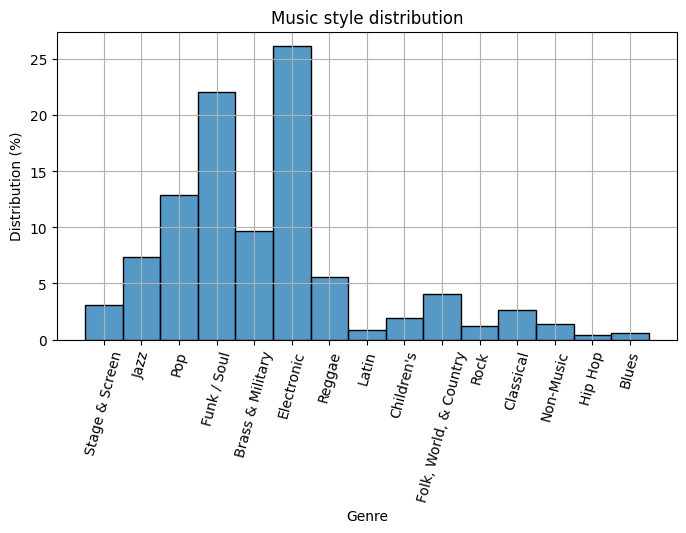

In [5]:
plt.figure(figsize=(8, 4))
plt.title('Music style distribution')

sns.histplot(df, x="genre", stat="percent")

plt.xlabel("Genre")
plt.xticks(np.arange(len(set(df['genre'].tolist()))), list(set(df['genre'].tolist())), rotation=75)
plt.ylabel("Distribution (%)")

plt.grid()
plt.show()

### Comments
- Almost `50%` of the collection contains `Folk, World, & Country` and `Non-Music` tracks.
- Almost `13%` of the collection contains `Children's` music.

### Save the results
Save the full result to tsv 

In [7]:
df['tag'] = df['genre'] + '---' + df['sub genre']

df['tag'].value_counts().to_csv('../results/genre.tsv', sep='\t', index=True)

## Tempo
- How fast and danceable is the music?

### Plot tempo distribution

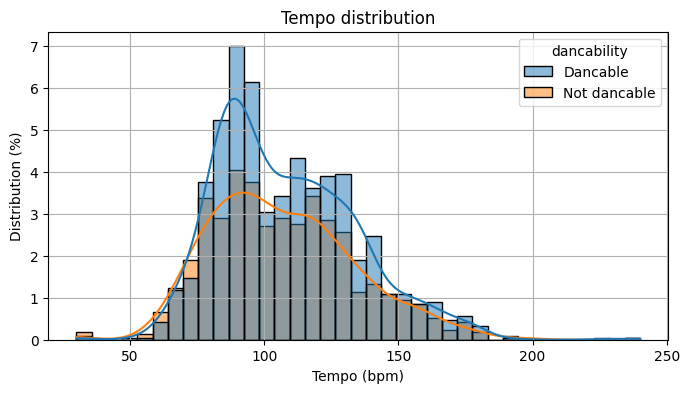

In [8]:
plt.figure(figsize=(8, 4))
plt.title('Tempo distribution')

sns.histplot(df, x="tempo", hue="dancability", stat="percent", kde=True)

plt.xlabel("Tempo (bpm)")
plt.ylabel("Distribution (%)")
plt.grid()
plt.show()

### Comments

- The `tempo` distribution is normal distibution centered at `90 bpm`, with `7%` falling around `90 bpm`.
- `Dancable`/`Not dancable` distribution looks the same. Therefore, we can assume that there is no correlation.
- Higher `tempo` could be possible that the actual tempo is half its value, due to analysis error.

## Key/scale distribution
- Which keys/scales are used in the collection?

<Figure size 640x480 with 0 Axes>

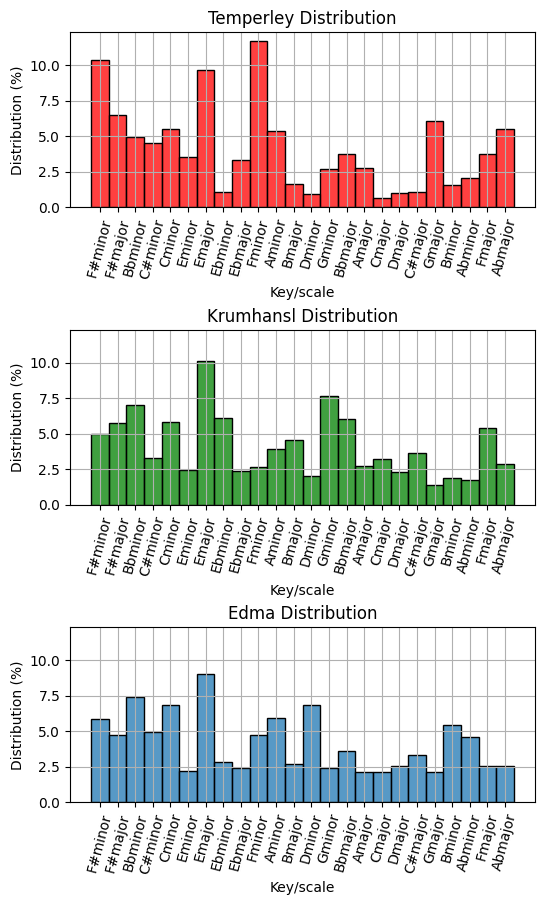

In [9]:
keys = np.array(df['key'].tolist())
scales = np.array(df['scale'].tolist())

temperley = np.array([keys[i, 0] + scales[i, 0] for i in range(len(keys))])
krumhansl = np.array([keys[i, 1] + scales[i, 1] for i in range(len(keys))])
edma = np.array([keys[i, 2] + scales[i, 2] for i in range(len(keys))])

plt.suptitle('Key/scale Distribution')
fig, axs = plt.subplots(3, 1, figsize=(6, 10), sharey=True)

axs[0].set_title('Temperley Distribution')
axs[1].set_title('Krumhansl Distribution')
axs[2].set_title('Edma Distribution')

sns.histplot(temperley, label='temperley', ax=axs[0], stat="percent", color='r')
sns.histplot(krumhansl, label='krumhansl', ax=axs[1], stat="percent", color='g')
sns.histplot(edma, label='edma', ax=axs[2], stat="percent")

for i in range(3):
    axs[i].grid()
    axs[i].set_xlabel("Key/scale")
    axs[i].set_xticks(np.arange(len(set(edma))), list(set(edma)), rotation=75)
    axs[i].set_ylabel("Distribution (%)")

plt.subplots_adjust(hspace=0.7)
plt.show()

In [10]:
mutual_predictions = np.where((temperley == krumhansl) & (krumhansl == edma))[0]
temperley_krumhansl = np.where(temperley == krumhansl)[0]
temperley_edma = np.where(temperley == edma)[0]
krumhansl_edma = np.where(krumhansl == edma)[0]

print(f'Out of {df.shape[0]} key/scale estimations only {len(mutual_predictions)} of them are equal for 3 of the profileTypes\n')
print(f'temperley and krumhansl matches {len(temperley_krumhansl)} estimation')
print(f'temperley and edma matches {len(temperley_edma)} estimation')
print(f'krumhansl and edma matches {len(krumhansl_edma)} estimation')

Out of 2100 key/scale estimations only 1031 of them are equal for 3 of the profileTypes

temperley and krumhansl matches 1215 estimation
temperley and edma matches 1089 estimation
krumhansl and edma matches 1721 estimation


### Comments
- Each of the `profileType`'s `key/scale` distribution looks different.
- There are a lot of tracks identified as `Fminor` using `temperley`, but not that many in the other two.
- Some parts of `krumhansl` and `edma` distribution looks similar.
- A small portion of `temperley` looks similar to `edma` also

## Loudness
- What about loudness?

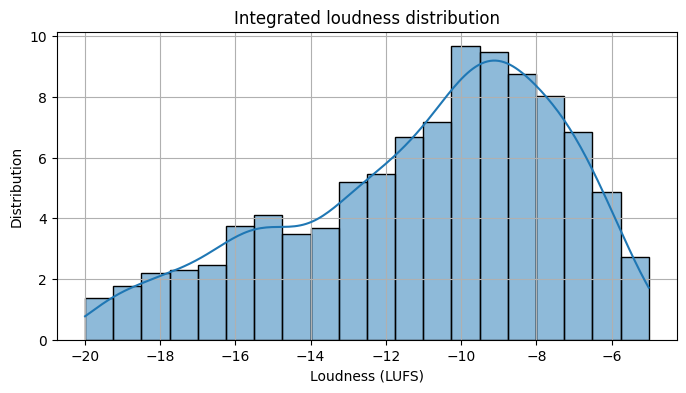

In [11]:
plt.figure(figsize=(8, 4))
plt.title('Integrated loudness distribution')

sns.histplot(df, x="loudness", kde=True, stat="percent")

plt.xlabel("Loudness (LUFS)")
plt.ylabel("Distribution")
plt.grid()
plt.show()

### Comments
- Most of the `loudness` happens to be around `-10 LUFS`. This is standard loudness level of songs.
- We can see it goes all the way to `-20 LUFS`. This could be due to the presence of `Non-Music` content

## Arousal/valence
- How is music represented in terms of arousal/valence emotion space?

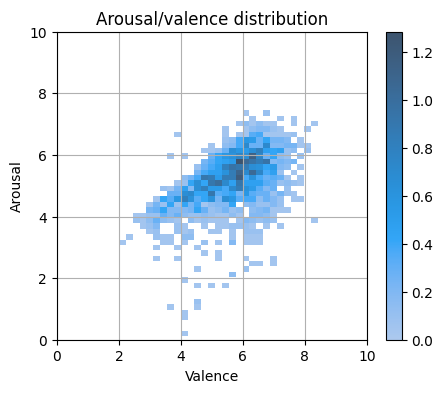

In [12]:
plt.figure(figsize=(5, 4))

sns.histplot(df, x="valence", y="arousal", cbar=True, stat="percent")

plt.title('Arousal/valence distribution')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()

### Comments
- The `arousal/valence` distribution is concentrated mostly around `6` and `6` respectively.
- There are no data for extreme `arousal`.
- Balanced distribution of `valence`.
- There are tracks that have no energy at all.

## Dancability
- How much of the music is vocal vs instrumental?

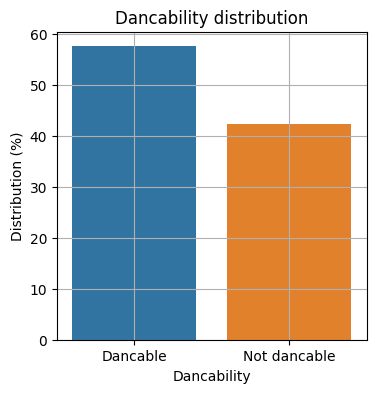

In [13]:
plt.figure(figsize=(4, 4))
plt.title('Dancability distribution')

sns.countplot(df, x="dancability", stat="percent", hue="dancability")

plt.xlabel("Dancability")
plt.ylabel("Distribution (%)")
plt.grid()
plt.show()

### Comments
- The collection contains almost `60%` of the tracks that are `dancable`.
- From `Music style` analysis we found that there around `20%` `Non-Music` content.

## Observations
**1. Is this collection diverse in terms of music styles, tempos, tonality, emotion, etc?**
- The collection indeed has diverse `Music style`, but we can be a bias toward `Folk`. but we know there are a lot of `sub genres` of 'Folk' compared to others
- The emotion range is mostly neutral. but the distribution does have a wide range of emotion.

**2. Comment on differences in key and scale estimation using the three profiles (`temperley`, `krumhansl`, `edma`). What is the % of tracks on which all three estimations agree? If we had to select only one profile to present to the users, which one should we use?**
- The difference in `key/scale` using the 3 different profiles is clearly visible from the plots. As I commented above, I feel like `edma` would be a better choice for playlist recommendation.

**3. Comment on loudness. Does its distribution make sense?**
- As mentioned, the `loudness` distribution looks standard and makes sense.